In [6]:
import os
import h5py
import json
import pandas as pd

import torch
import numpy as np
from torchvision.io import ImageReadMode, decode_image

import matplotlib.pyplot as plt

In [7]:
root = "/home/jluesch/Documents/data/plankton/hdf5/"

In [3]:
files = os.listdir(root)

In [5]:
acc_ids = []
acc_names = []

hdf5_handles = dict()
all_files_entries = dict()
class_names_dict = dict()
for hdf5_file in files:
    print(hdf5_file, end=" ")
    all_files_entries[hdf5_file] = []
    class_ids = []
    class_names = []
    hdf5_file_path = os.path.join(root, hdf5_file)
    file = h5py.File(hdf5_file_path, "r")
    hdf5_handles[hdf5_file] = file

    # Read the JSON string from the 'file_index' dataset
    file_index_json = file["file_index"][()]
    file_index = json.loads(file_index_json)

    # Add the HDF5 file name to each entry and accumulate the file entries
    for entry in file_index["files"]:
        entry["hdf5_file"] = hdf5_file_path  # Add the HDF5 file name to the entry
        all_files_entries[hdf5_file].append(entry)
        class_id = entry["class_id"]
        class_str = entry["class_str"]
        if class_id not in class_ids:
            class_ids.append(class_id)
            class_names.append(class_str)

        if class_id not in acc_ids:
            acc_ids.append(class_id)
            acc_names.append(class_str)
    class_names_dict[hdf5_file] = class_names

    print(len(class_ids))

2011-TRAIN.hdf5 94
2007-TRAIN.hdf5 88
2013-VAL.hdf5 93
2009-VAL.hdf5 94
2008-VAL.hdf5 92
2014-TRAIN.hdf5 94
2012-VAL.hdf5 95
2010-TRAIN.hdf5 97


In [6]:
class_names_dict.keys()

dict_keys(['2011-TRAIN.hdf5', '2007-TRAIN.hdf5', '2013-VAL.hdf5', '2009-VAL.hdf5', '2008-VAL.hdf5', '2014-TRAIN.hdf5', '2012-VAL.hdf5', '2010-TRAIN.hdf5'])

In [7]:
all_names = set()
for v in class_names_dict.values():
    all_names = all_names.union(set(v))

In [8]:
print(len(all_names))

102


In [9]:
for k, v in class_names_dict.items():
    print(k, " missing :", all_names.difference(set(v)))

2011-TRAIN.hdf5  missing : {'Tiarina_fusus', 'bead', 'pollen', 'Akashiwo', 'Gonyaulax', 'bubble', 'Tontonia_appendiculariformis', 'Chaetoceros_didymus_flagellate'}
2007-TRAIN.hdf5  missing : {'Euplotes_sp', 'Hemiaulus', 'bead', 'dino_large1', 'Akashiwo', 'Gonyaulax', 'Cerataulina_flagellate', 'bubble', 'Bacillaria', 'Tontonia_appendiculariformis', 'pennate_morphotype1', 'Cochlodinium', 'Chaetoceros_didymus_flagellate', 'Emiliania_huxleyi'}
2013-VAL.hdf5  missing : {'Hemiaulus', 'Tiarina_fusus', 'kiteflagellates', 'Didinium_sp', 'Akashiwo', 'Gonyaulax', 'bubble', 'Bidulphia', 'Leptocylindrus_mediterraneus'}
2009-VAL.hdf5  missing : {'Hemiaulus', 'kiteflagellates', 'Akashiwo', 'Bacillaria', 'bubble', 'Emiliania_huxleyi', 'Chaetoceros_didymus_flagellate', 'Leptocylindrus_mediterraneus'}
2008-VAL.hdf5  missing : {'kiteflagellates', 'Didinium_sp', 'bead', 'dino_large1', 'Akashiwo', 'Pseudochattonella_farcimen', 'Bacillaria', 'Emiliania_huxleyi', 'Cochlodinium', 'Leptocylindrus_mediterraneus

In [10]:
all_files_entries

{'2011-TRAIN.hdf5': [{'index': 0,
   'path': '2011_amoeba_IFCB1_2011_255_210152_00669.png',
   'class_str': 'amoeba',
   'class_id': 0,
   'hdf5_file': '/home/jluesch/Documents/data/plankton/hdf5/2011-TRAIN.hdf5'},
  {'index': 1,
   'path': '2011_amoeba_IFCB1_2011_284_210748_00147.png',
   'class_str': 'amoeba',
   'class_id': 0,
   'hdf5_file': '/home/jluesch/Documents/data/plankton/hdf5/2011-TRAIN.hdf5'},
  {'index': 2,
   'path': '2011_amoeba_IFCB1_2011_284_212925_02994.png',
   'class_str': 'amoeba',
   'class_id': 0,
   'hdf5_file': '/home/jluesch/Documents/data/plankton/hdf5/2011-TRAIN.hdf5'},
  {'index': 3,
   'path': '2011_amoeba_IFCB1_2011_284_215233_00989.png',
   'class_str': 'amoeba',
   'class_id': 0,
   'hdf5_file': '/home/jluesch/Documents/data/plankton/hdf5/2011-TRAIN.hdf5'},
  {'index': 4,
   'path': '2011_amoeba_IFCB5_2011_039_034322_00396.png',
   'class_str': 'amoeba',
   'class_id': 0,
   'hdf5_file': '/home/jluesch/Documents/data/plankton/hdf5/2011-TRAIN.hdf5'},
 

In [11]:
class_ids_all = [
    el_dict["class_id"]
    for file_data in all_files_entries.values()
    for el_dict in file_data
]

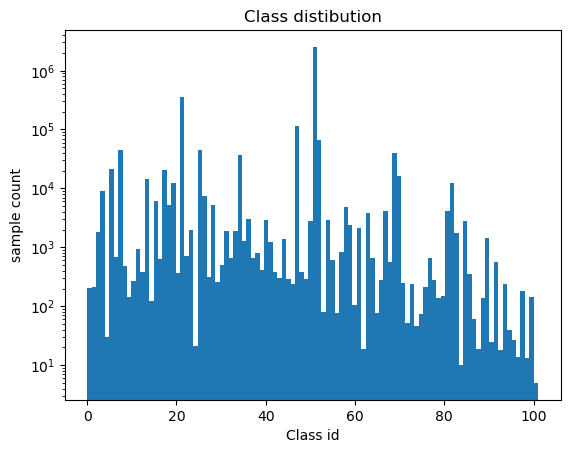

In [12]:

f, a = plt.subplots(1,1)
plt.hist(class_ids_all, bins=102)
a.set_yscale('log')
plt.title('Class distibution')
plt.xlabel('Class id')
plt.ylabel('sample count')
plt.savefig('./class_distibution.png', dpi=200, bbox_inches='tight')
plt.show()

In [13]:
unique, counts = np.unique(class_ids_all, return_counts=True)
sorted_counts = sorted(counts, reverse=True)
print(np.sum(sorted_counts[:5]/ np.sum(counts)))

0.906802151753229


In [14]:
hdf5_file_name = list(all_files_entries.keys())[0]

all_files_entries[hdf5_file_name][0]['path']

'2011_amoeba_IFCB1_2011_255_210152_00669.png'

In [15]:
hdf5_file_name = list(all_files_entries.keys())[0]

img_bytes = hdf5_handles[hdf5_file_name][all_files_entries[hdf5_file_name][0]["path"]][
    ()
]

image = torch.frombuffer(np.copy(img_bytes), dtype=torch.uint8)
image = decode_image(image, ImageReadMode.RGB)
image = (image / 255.0).to(torch.float32)

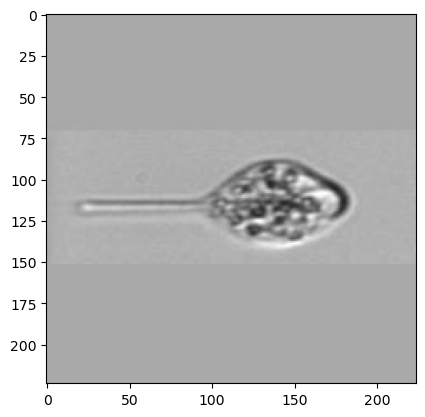

In [16]:
c, h, w = image.size()
plt.imshow(image.permute(1, 2, 0))
plt.show()

In [4]:
flatened_img = image[0, :, :].flatten()
entropy1 = torch.sum(-flatened_img * torch.log(flatened_img))
print(entropy1)


f, a = plt.subplots(1, 1)
plt.hist(flatened_img, bins=50)
a.set_yscale("log")
plt.title("Pixel distibution")
plt.xlabel("Class id")
plt.ylabel("sample count")
plt.savefig("./pixel_distibution.png", dpi=200, bbox_inches="tight")
plt.show()

NameError: name 'image' is not defined

In [18]:
unique, counts = np.unique(flatened_img, return_counts=True)
sorted_pix_counts = sorted(counts, reverse=True)
print(np.sum(sorted_pix_counts[:5] / np.sum(sorted_pix_counts)))

0.7859933035714286


In [12]:
import sys

sys.path.insert(0, "..")

from dinov2.data.augmentations import DataAugmentationDINO
from dinov2.data.loaders import make_dataset

root = "/home/jluesch/Documents/data/plankton/hdf5/"
ds_path = f"HDF5Dataset:split=TRAIN:root={root}:extra=*"

data_transform_cpu = DataAugmentationDINO(
    [0.99, 1.0],
    [0.05, 0.32],
    8,
    global_crops_size=224,
    local_crops_size=96,
    do_transform_on_gpu=False,
    use_kornia=False,
)

dataset = make_dataset(
    dataset_str=ds_path,
    transform=data_transform_cpu,
    target_transform=lambda _: (),
    with_targets=False,
    cache_dataset=False,
)

/home/jluesch/micromamba/envs/dinov2/lib/python3.9/site-packages/torchvision/transforms/v2/_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `transforms.Compose([transforms.ToImageTensor(), transforms.ConvertImageDtype()])`.
  warnings.warn(


Dataset kwargs {'split': <_Split.TRAIN: 'train'>, 'root': '/home/jluesch/Documents/data/plankton/hdf5/', 'extra': '*', 'do_short_run': False}
root: /home/jluesch/Documents/data/plankton/hdf5/, extra_root: *, extra_path: -TRAIN.hdf5
Datasets file list:  ['/home/jluesch/Documents/data/plankton/hdf5/2011-TRAIN.hdf5', '/home/jluesch/Documents/data/plankton/hdf5/2007-TRAIN.hdf5', '/home/jluesch/Documents/data/plankton/hdf5/2014-TRAIN.hdf5', '/home/jluesch/Documents/data/plankton/hdf5/2010-TRAIN.hdf5']
#unique_class_ids: _Split.TRAIN, 102
#unique_class_names: ['Akashiwo' 'Amphidinium_sp' 'Asterionellopsis' 'Bacillaria' 'Bidulphia'
 'Cerataulina' 'Cerataulina_flagellate' 'Ceratium'], 102


In [11]:
imgs = dataset[1][0]
print(imgs.keys())

f, a = plt.subplots(3, 4)
f.set_size_inches(10,7)
f.tight_layout()
count = 0
for k in imgs.keys():
    for img in imgs[k]:
        norm_img = (img - torch.min(img)) / (torch.max(img) - torch.min(img))
        a[count // 4,count % 4].imshow(norm_img.permute(1, 2, 0))
        a[count // 4, count % 4].set_title(k)
        count += 1

dict_keys(['global_crops', 'local_crops', 'offsets'])


NameError: name 'plt' is not defined

In [19]:
import matplotlib.image as mpimg
from datetime import datetime

path_img = "/home/jluesch/Documents/data/examples/h_and_e_slide_ex.jpg"
img = mpimg.imread(path_img)
img.shape

(517, 735, 3)

In [ ]:
from kornia.augmentation import RandomResizedCrop

rrc_op = RandomResizedCrop([224, 224], scale=(0.08, 1.0))

img = dataset[1][0]["local_crops"][0]


rrc_op()

torch.float32 tensor(1.) tensor(0.)
image shape torch.Size([224, 224, 3])
torch.Size([50176, 3])
FZ:  0:00:00.079633
quick #4


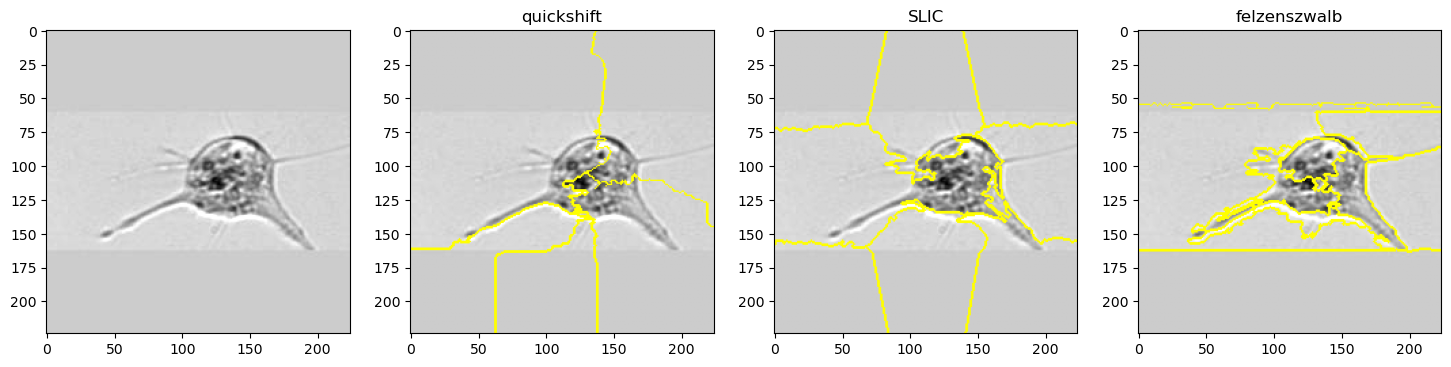

In [23]:
from sklearn.cluster import KMeans
from skimage.segmentation import felzenszwalb, slic, quickshift
from skimage.segmentation import mark_boundaries
import torchvision
from torchvision.transforms.functional import InterpolationMode

img = dataset[1][0]["global_crops"][0]

if not torch.is_tensor(img):
    img = torch.tensor(img)

# img = imgs["global_crops"][0]
img = (img - img.min()) / (img.max() - img.min())
print(img.dtype, img.max(), img.min())
img = (img * 255).to(torch.uint8)
img_gray = img[0, :, :]

if img.size(0) == 3:
    img = img.permute((1, 2, 0))

orig_img_dims = img.shape[:2]
print(f"image shape {img.shape}")

grid_x, grid_y = torch.meshgrid(
    torch.arange(img_gray.size(0)), torch.arange(img_gray.size(1)), indexing="ij"
)
grid_x = (grid_x - torch.min(grid_x)) / (torch.max(grid_x) - torch.min(grid_x)) * 2
grid_y = (grid_y - torch.min(grid_y)) / (torch.max(grid_y) - torch.min(grid_y)) * 2

preprocessed_data = torch.stack([img_gray, grid_x, grid_y], dim=2).flatten(0, -2)
print(preprocessed_data.size())

segments_quick = quickshift(img, kernel_size=20, max_dist=15, ratio=0.5)
segments_slic = slic(img, n_segments=10, compactness=10, sigma=1.0, start_label=1)
start_t = datetime.now()
segments_fz = felzenszwalb(img, scale=300, sigma=0.5, min_size=600)
delta_fz = datetime.now() - start_t
print('FZ: ', delta_fz)

# saved args
# segments_quick = quickshift(img, kernel_size=7, max_dist=7, ratio=0.5)
# segments_slic = slic(img, n_segments=10, compactness=10, sigma=1.0, start_label=1)
# segments_fz = felzenszwalb(img, scale=150, sigma=0.5, min_size=150)

print(f"quick #{segments_quick.max()}")

kmeans_op = KMeans(n_clusters=10)
res = kmeans_op.fit_predict(preprocessed_data)
img_labels = res.reshape(img_gray.size())

n_plots = 4
f, a = plt.subplots(1, n_plots)
f.set_size_inches(18, 6)
a[0].imshow(img)
a[1].imshow(mark_boundaries(np.array(img), segments_quick))
a[1].set_title("quickshift")
a[2].imshow(mark_boundaries(np.array(img), segments_slic))
a[2].set_title("SLIC")
a[3].imshow(mark_boundaries(np.array(img), segments_fz))
a[3].set_title("felzenszwalb")

# a[4].imshow(img_labels)
# a[4].imshow(mark_boundaries(np.array(img), img_labels))
# for i in range(4, n_plots):
#    a[i].imshow(mark_boundaries(np.array(img), segments_quick == i))

plt.savefig("segmentations.jpg", dpi=200)
plt.show()

In [15]:
patch_size = 14
local_crop_size = 224
maxpool_op = torch.nn.MaxPool2d(
    kernel_size=patch_size,
    stride=patch_size,
    padding=0,
    dilation=1,
    return_indices=True,
)

# Not used
unpool_op = torch.nn.MaxUnpool2d(kernel_size=patch_size, stride=patch_size, padding=0)

resize_op = torchvision.transforms.Resize(
    orig_img_dims, interpolation=InterpolationMode.NEAREST_EXACT
)

In [16]:
def seg_to_patched_seg(segments):
    segments = segments / segments.max()
    conv_input = torch.tensor(segments[None, :, :])
    pooled_seg, pool_indices = maxpool_op(conv_input)
    # unpooled_seg = unpool_op(pooled_seg, pool_indices)

    resized_masks = resize_op(pooled_seg)[0, :, :]
    resized_masks_int = (resized_masks * len(np.unique(resized_masks))).to(torch.int32)

    return pooled_seg, resized_masks_int

SLIC


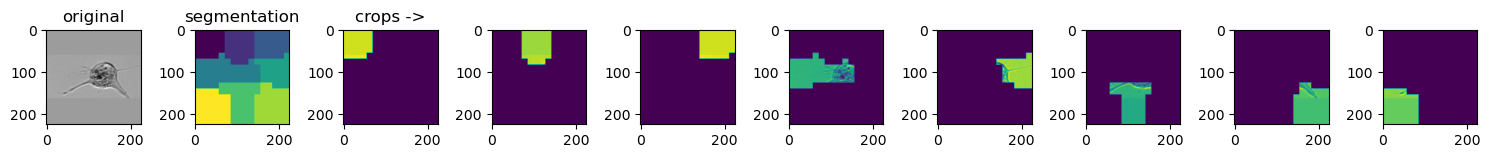

Quickshift


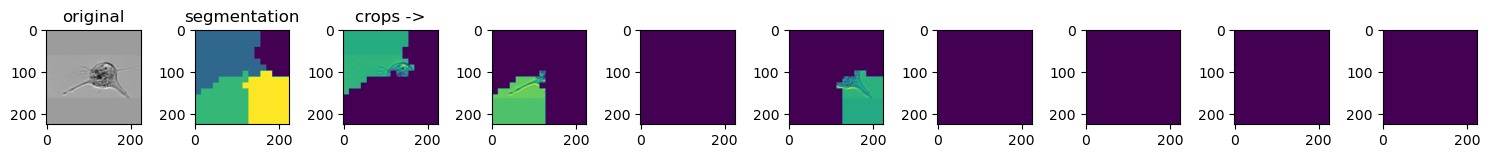

Felzenschwalb


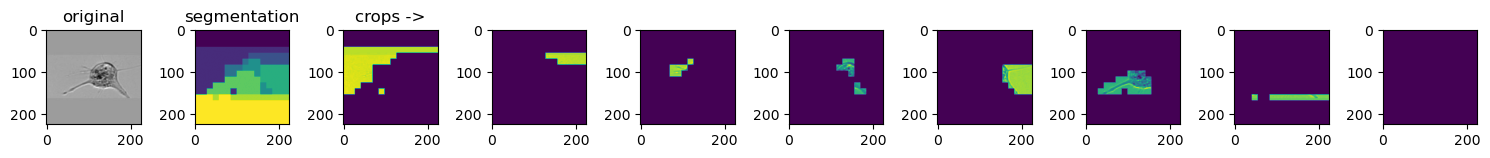

In [18]:
for seg, name in zip(
    [segments_slic, segments_quick, segments_fz],
    ["SLIC", "Quickshift", "Felzenschwalb"],
):
    print(name)
    pooled_seg, resized_masks_int = seg_to_patched_seg(seg)

    n_plots = 10
    f, a = plt.subplots(1, n_plots)
    f.set_size_inches(15, 7)
    a[0].set_title("original")
    a[1].set_title("segmentation")
    a[2].set_title("crops ->")

    a[0].imshow(img)
    a[1].imshow(resize_op(pooled_seg)[0, :, :])
    idx = np.argwhere(resized_masks_int == 2)
    img_gray = img[:, :, 0]
    for i in range(2, n_plots):
        mask_idx = i - 1
        fragment = torch.zeros(img_gray.shape, dtype=torch.uint8)
        fragment[resized_masks_int == mask_idx] = img_gray[
            resized_masks_int == mask_idx
        ]
        a[i].imshow(fragment)

    f.tight_layout()
    plt.savefig(f"seg_examples_{name}.jpg", dpi=200, bbox_inches="tight")
    plt.show()

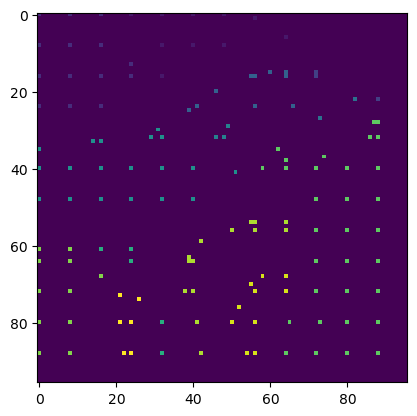

In [98]:
plt.imshow(unpooled_seg[0,:,:])
plt.show()

In [ ]:
from skimage.segmentation import watershed

watershed(img)

ImportError: /home/jluesch/micromamba/envs/dinov2/lib/python3.9/site-packages/zmq/backend/cython/../../../../.././libstdc++.so.6: version `GLIBCXX_3.4.30' not found (required by /home/jluesch/micromamba/envs/dinov2/lib/python3.9/site-packages/scipy/fft/_pocketfft/pypocketfft.cpython-39-x86_64-linux-gnu.so)

In [82]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

nbrs = NearestNeighbors(n_neighbors=100, algorithm="ball_tree").fit(preprocessed_data)
distances, indices = nbrs.kneighbors()

In [83]:
img_labels = torch.zeros(indices.shape[0])

for i in range(indices.shape[0]):
    nbhs = indices[i, :]
    img_labels[nbhs] = i

img_labels = img_labels.reshape(img.size())

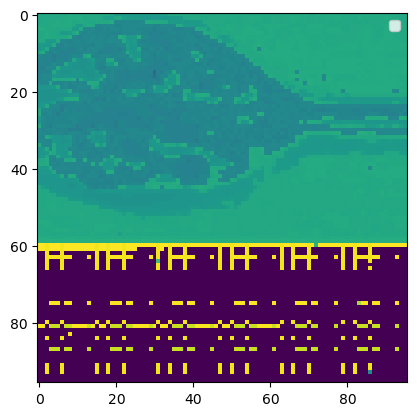

In [84]:
plt.imshow(img_labels)
plt.legend(img_labels)
plt.show()

In [2]:
import torch
from skimage.transform import rescale

img = torch.ones(100, 100)

img = rescale(img, 0.2)
img.shape

(20, 20)

In [8]:
from kornia import augmentation

a = augmentation.RandomResizedCrop(
    [224, 224],
    scale=[0.6,0.8],
    same_on_batch=False,
)

img = torch.ones(10, 10)
print(img)
b=a(img)
b.shape

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])


torch.Size([1, 1, 224, 224])